# Port of departure as a demographic classifier aboard the Titanic

## Part 1. Exploring the data
I wanted a high-level overview of how the variables described in the Titanic data set correlate with passenger survival outcome. I had two rough approaches to initially explore the data, one for numeric values (like age, number of family members) and one for categorical data (like sex and port of departure):
-  For numeric values I ran Pearson's R correlations using the function developed in the lecture. I correlated each variable with the 'Survived' variable.
-  For categorical data, I made summary tables of mean survival values using Pandas 'groupby' objects grouped by the variable of interest.

Note that throughout this analysis I reference 'mean survival rate'. Because 'Survival' is recorded as a 0 (perished) or 1 (survived), taking the mean of this variable for a given group effectively calcuates the proportion of passengers that survived for that group. 

To begin I loaded the data into a pandas data frame.

In [1]:
# loading in the Titanic data to a pandas data frame

import pandas as pd
import numpy as np

titanic_df = pd.read_csv('titanic_data.csv')

In [2]:
# I'm going to use my Pearson's R correlation function to quickly check out the correlation between a few \
# of the numeric variables

def correlation(x, y):
    correlation = (((x - x.mean()) / x.std(ddof=0)) * ((y - y.mean()) / y.std(ddof=0))).mean()
    return (correlation)

survival = titanic_df['Survived']
pclass = titanic_df['Pclass']
fare = titanic_df['Fare']
parent_children = titanic_df['Parch']
sibling_spouse = titanic_df['SibSp']
age = titanic_df['Age']

print "The Pearson's R value for 'Survival' and 'Class' is", correlation(survival, pclass)
print "The Pearson's R value for 'Survival' and 'Fare' is", correlation(survival, fare)
print "The Pearson's R value for 'Survival' and 'Parent/ Children' is", correlation(survival, parent_children)
print "The Pearson's R value for 'Survival' and 'Sibling/Spouse' is", correlation(survival, sibling_spouse)
print "The Pearson's R value for 'Survival' and 'Age' is", correlation(survival, age)

The Pearson's R value for 'Survival' and 'Class' is -0.338481035961
The Pearson's R value for 'Survival' and 'Fare' is 0.257306522385
The Pearson's R value for 'Survival' and 'Parent/ Children' is 0.0816294070835
The Pearson's R value for 'Survival' and 'Sibling/Spouse' is -0.0353224988857
The Pearson's R value for 'Survival' and 'Age' is -0.0779826784139


### Findings for numeric data
This output is roughly what one would expect. There is a 'moderate positive correlation' (Pearson's correlation = 0.3384) between survival and higher ticket class, and a similar correlation between survival and fare. Note that the correlation with class reads out as negative since lower-class means a higher numeric value associated with class (i.e. low class = 3, middle class = 2, and high class = 1). I decided not to invert this data since it this is a rough 'first pass' analysis.

Interestingly, there is minimal correlation with survival rate and whether passengers had family on-board, either in the form of parent/child or sibling/spouse. This lack of correlation surprised me, so I decided to check the data to make sure that there aren't a lot of 'null' data points for family on-board (see below).

In [3]:
# Now I want to look at some non-numeric values as a first pass. The only ones that makes sense to me are 'Sex' and\
# 'Embarkation', since things like cabin number aren't very relevant. I'll do this by grouping by these values and
# calculating the mean survival rate.

print "The surviving fraction of all passengers on the titanic was" , titanic_df['Survived'].mean()
print ""
print "The surviving fraction of passengers by sex is summarized below:"
print (titanic_df.groupby('Sex', as_index=False))['Survived'].mean()
print ""
print "The surviving fraction of passengers by embarkation port is summarized below:" 
print (titanic_df.groupby('Embarked', as_index=False))['Survived'].mean()

The surviving fraction of all passengers on the titanic was 0.383838383838

The surviving fraction of passengers by sex is summarized below:
      Sex  Survived
0  female  0.742038
1    male  0.188908

The surviving fraction of passengers by embarkation port is summarized below:
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


### Findings catagorical data
Since I'm looking at mean survival rates between two groups, I also wanted to know the mean survival rate of all passengers. Mean survival rate was 38.4% among all passengers, 74% for female passengers, and 18.9% for male passengers. This isn't particularly surprising since 'women and children first' would have been the evacuation policy. I am interested, however, in the higher survival rate for passengers who embarked at Cherbourg, France (55.4%) compared to those who embarked at Queenstown, Ireland (39.0%) or Southampton, England (33.7%). Certainly embarkation port is a proxy for socioeconomic and demographic factors, and I'd like to explore this further.

### Check for null data
As mentioned in the 'Findings for numeric data' section, I wanted to check for null values in the data to ensure correlation (or lack of correlation) is robust. The 'Age' and 'Cabin' columns are null for a high percentage of the entries, so if I were to use these varibles in my analysis I'd need to deal with value imputation. For my data of interest, however, this wasn't necessary.

In [4]:
for x in titanic_df.columns:
    j = titanic_df[x].isnull().sum()
    print 'The number of null entries for', x, 'is', j

The number of null entries for PassengerId is 0
The number of null entries for Survived is 0
The number of null entries for Pclass is 0
The number of null entries for Name is 0
The number of null entries for Sex is 0
The number of null entries for Age is 177
The number of null entries for SibSp is 0
The number of null entries for Parch is 0
The number of null entries for Ticket is 0
The number of null entries for Fare is 0
The number of null entries for Cabin is 687
The number of null entries for Embarked is 2


## Part 2. Understanding the embarkment data
### Framing the Question 
Here are  questions I'll try to answer:

*Q1. What was the class breakdown for passengers departing from different ports?*

*Q2. Do passengers of the same class from different embarkation ports have similar survival rates?*

*Q3. Are these survival rates correlated with any demographic differences such as gender or familial status?*

### Q1. Passenger class by embarkation port
I'll begin with examining the class of passengers from the different embarkation ports. I'll do this by first making a simple table of 'average class' grouped by embarkation port and a histogram of passengers in each class by embarkation port.

In [5]:
# I'm going to change the port codes in 'Embarked' to the actual port names. It will make it easier for plotting \
# and making tables of the data
titanic_df.Embarked.replace(['C', 'S', 'Q'], ['Cherbourg', 'Southampton', 'Queenstown'], inplace=True)

In [6]:
# Determining the mean class of passenger by port

passengers_grouped_by_port = titanic_df.groupby('Embarked', as_index=False)

passengers_grouped_by_port['Pclass'].mean()

,Embarked,Pclass
0,Cherbourg,1.886905
1,Queenstown,2.909091
2,Southampton,2.350932


/Users/jeff/anaconda/envs/DAND/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


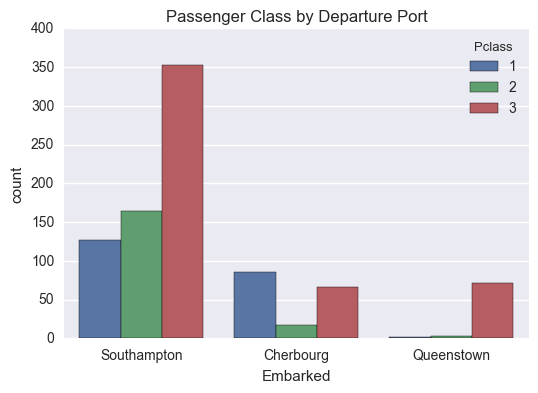

In [7]:
# Plotting the total number of passengers in each class by port

import seaborn as sns
sns.set(style="darkgrid")
%pylab inline

ax = sns.countplot(x="Embarked", hue="Pclass", data=titanic_df)
plt.title('Passenger Class by Departure Port')

Both the data summary and the histogram data show that embarkation port is a related to for socioeconomic status. Nearly all of the passengers embarking at Queenstown were in 3rd class, while Southampton and Cherbourg had higher relative and absolute numbers of 1st class passengers. The table summarizing mean class by port shows that Cherbourg had the highest proportion of 1st class passengers among the departure ports. 

### Q2. Passenger survival rate by class and port of departure
I wanted to know if the higher overall survival rate of Cherbourg was an artifact of the higher percentage of 1st class passengers or if all passengers from Cherbourg had higher survival rates. In other words, would low class passengers from Cherbourg have higher survival rates than low class passengers from Queenstown or Southampton?
Note that I decided to make comparisons only between low-class passengers because the number of high- and middle-class passengers departing from Queenstown is small (2 passengers and 3 passengers, respectively; see table below for occurance of passengers by gender, class, and port).

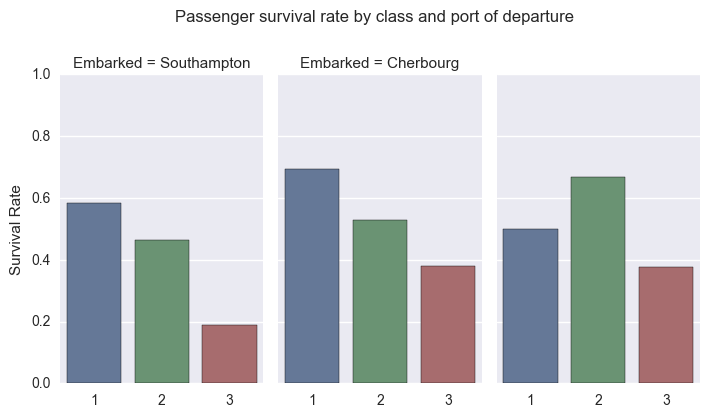

In [8]:
# Looking at the survival rates for classes by port. Low class survival rate is the same for \
# Cherbourg and Queenstown.
g = sns.factorplot(x="Pclass", y="Survived", col="Embarked", data=titanic_df, saturation=.5,kind="bar", ci=None, aspect=.6)
g.set_axis_labels("", "Survival Rate")
g.set(ylim=(0, 1))
plt.title('Passenger survival rate by class and port of departure', x=-.6, y=1.15)

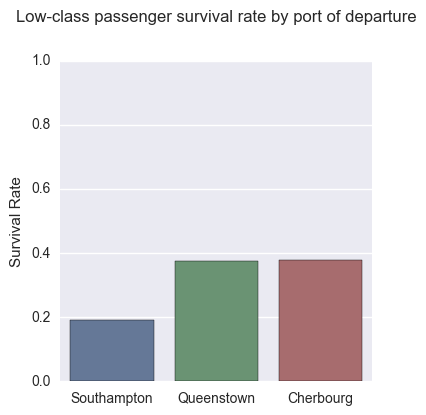

In [9]:
# Since we're most interested in low-class survival, let's print only 3-rd class survival rates by port.

low_class_passengers = titanic_df[titanic_df['Pclass']==3]

g = sns.factorplot(x="Embarked", y="Survived", data=low_class_passengers, saturation=.5,kind="bar", ci=None, aspect=1)
g.set_axis_labels("", "Survival Rate")
g.set(ylim=(0, 1))
plt.title('Low-class passenger survival rate by port of departure', y=1.1)

In [10]:
# This table presents the numeric data from the two factor plots above. 
# The survival rate of 3rd-class passengers is nearly identical for 
# Cherbourg (0.38) and Queenstown (0.38) but much less for Southampton (0.19)

group_by_class_embarked = titanic_df.groupby(['Pclass','Embarked'])

print 'The table below shows the mean survival rate by port and class:'
print ""
group_by_class_embarked['Survived'].mean()

The table below shows the mean survival rate by port and class:



Pclass  Embarked   
1       Cherbourg      0.694118
        Queenstown     0.500000
        Southampton    0.582677
2       Cherbourg      0.529412
        Queenstown     0.666667
        Southampton    0.463415
3       Cherbourg      0.378788
        Queenstown     0.375000
        Southampton    0.189802
Name: Survived, dtype: float64

My hypothesis that 3rd-class passengers from Cherbourg might have higher survival rates was only partially correct. The rate for survival for 3rd-class passengers was nearly identical for Cherbourg and Queenstown (0.378788 vs. 0.375000), but 3rd-class passengers embarking at Southampton had a much lower survival rate (0.189802). These differences are strickly correlative, but could indicate distinct demographic groups departing from each of the three ports. 

Next I wanted to look at gender and familial differences for 3rd-class passengers departing from each of the three ports, and examine if these differences are correlated with distinct survival outcomes.

### Q3. Survival rate and demographic diffences by port

The analysis above shows that lower-class passengers departing from Cherbourg and Queenstown survived at similar rates but that lower-class passengers departing from Southampton survived at a much lower rate. I wanted to determine if there were gender differences or family status differences for low-class passengers from the three ports.

### Gender distribution for low-class passengers departing from each port

In [11]:
# The table below lists the passenger counts by gender for each class and embarkation port.

low_class_passengers = titanic_df[titanic_df['Pclass']==3]

print "Occurance of low-class passengers by gender and port"
low_class_passengers.groupby(['Embarked','Sex','Pclass']).size()

Occurance of low-class passengers by gender and port


Embarked     Sex     Pclass
Cherbourg    female  3          23
             male    3          43
Queenstown   female  3          33
             male    3          39
Southampton  female  3          88
             male    3         265
dtype: int64

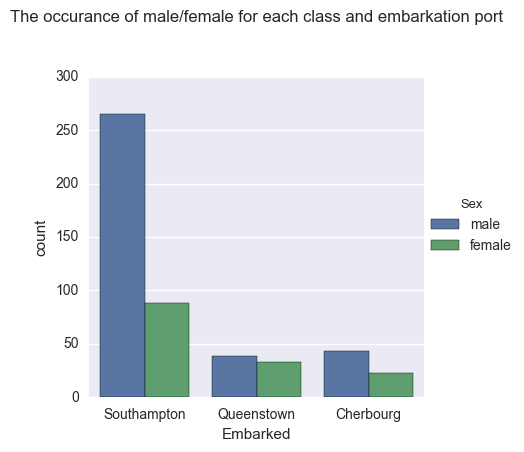

In [12]:
# The histogram below show passenger counts by gender for each class and embarkation port.

g = sns.factorplot(x="Embarked", hue="Sex", data=low_class_passengers, kind="count", size=4, aspect=1)
plt.title('The occurance of male/female for each class and embarkation port', y=1.15)

This data shows that males are a larger consitutent of 3rd-class passengers from Southampton than from Queenstown and Cherbourg. Next I wanted to consider if the survival rates by gender are the same for all departure ports.

In [13]:
# This table presents the survival rates of low-class passengers by port and gender

low_class_passengers.groupby(['Pclass', 'Embarked', 'Sex'], as_index=True)['Survived'].mean().reset_index()

,Pclass,Embarked,Sex,Survived
0,3,Cherbourg,female,0.652174
1,3,Cherbourg,male,0.232558
2,3,Queenstown,female,0.727273
3,3,Queenstown,male,0.076923
4,3,Southampton,female,0.375000
5,3,Southampton,male,0.128302


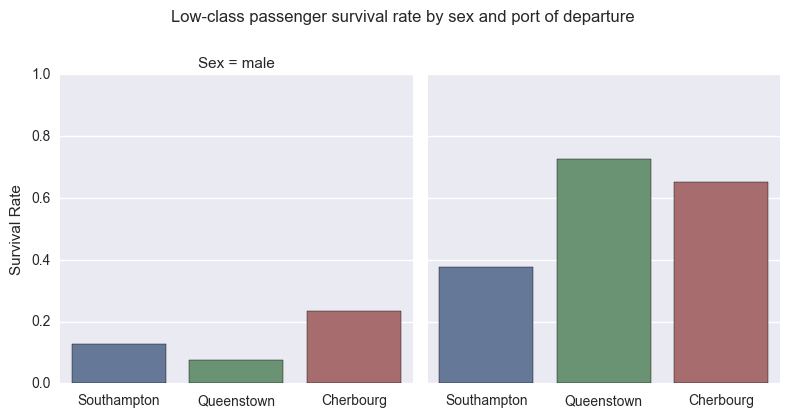

In [14]:
# The factor bar plot below presents survival rate by gender and embarkation port for low-class passengers.

g = sns.factorplot(x="Embarked", y="Survived", col = "Sex", data=low_class_passengers, saturation=.5,kind="bar", ci=None, aspect=1)
g.set_axis_labels("", "Survival Rate")
g.set(ylim=(0, 1))
plt.title('Low-class passenger survival rate by sex and port of departure', x=-.07, y=1.15)


These data reveal an interesting facet of the data. While as a whole 3rd-class passengers departing from Queenstown and Cherbourg have identical survival rates, when you consider survival by gender you see that Queenstown men perished at a higher rate than Cherbourg and Southampton men, and Queenstown women survived at a rate higher than either Cherbourg or Southampton women.

Similarly, Southampton women perished at a much higher rate than fellow 3rd-class women from either Queenstown or Cherbourg. 

These data are purely correlative but does lead to speculation about possible demographic differences in low-class passengers departing from different ports.

Perhaps low-class Queenstown women were more likely to be men (spouses or siblings) who advocated for their survival and perished in the process?

Perhaps low-class Southampton women were traveling alone as domestic help and perished at a higher rate with no network of help on board?

There possibilities are speculative, but do lead to some interesting and deeper questioning about the types of passengers embarking from different ports.

### On board familial status for low-class passengers departing from each port

First I considered the average number of family members on board for 3rd-class women from each port.

In [15]:
# The table below lists the mean number of parent/child family members on board with low-class female passengers \
# grouped by port

low_class_passengers_female = low_class_passengers[low_class_passengers['Sex'] == 'female']

low_class_passengers_female.groupby(['Pclass', 'Embarked'], as_index=True)['Parch'].mean().reset_index()

,Pclass,Embarked,Parch
0,3,Cherbourg,0.826087
1,3,Queenstown,0.242424
2,3,Southampton,1.000000


In [16]:
# The table below lists the mean number of sibling/spouse family members on board with low-class female passengers \
# grouped by port

low_class_passengers_female.groupby(['Pclass', 'Embarked'], as_index=True)['SibSp'].mean().reset_index()

,Pclass,Embarked,SibSp
0,3,Cherbourg,0.565217
1,3,Queenstown,0.212121
2,3,Southampton,1.238636


Looking at the occurance data, it seems that my hypotheses were incorrect. Low-class women from Queenstown were the least likely to be traveling with family but the most likely to survive. Similarly, low-class Southampton women were the most likely to be traveling with family but the lest likely to survive.

To examine the direct relationship between number of family members on board and survival, I ran Pearson's R correlations between survival and family member count for low-class women. I also ran the analysis for all women passengers as a reference.

In [17]:
# Testing for Pearson's R correlation in the low-class female data for survival and familial variables.

#All women
all_passengers_women = titanic_df[titanic_df['Sex'] == 'female']
survival_all_female = all_passengers_women['Survived']
parent_children_all_female = all_passengers_women['Parch']
sibling_spouse_all_female = all_passengers_women['SibSp']


#Low class women
survival_low_class_female = low_class_passengers_female['Survived']
parent_children_low_class_female = low_class_passengers_female['Parch']
sibling_spouse_low_class_female = low_class_passengers_female['SibSp']

print "The Pearson's R value for 'Survival' and 'Parent/ Children' for low-class women is", correlation(survival_low_class_female, parent_children_low_class_female)
print "The Pearson's R value for 'Survival' and 'Sibling/Spouse' for low-class women is", correlation(survival_low_class_female, sibling_spouse_low_class_female)
print ""
print "The Pearson's R value for 'Survival' and 'Parent/ Children' for all women is", correlation(survival_all_female, parent_children_all_female)
print "The Pearson's R value for 'Survival' and 'Sibling/Spouse' for all women is", correlation(survival_all_female, sibling_spouse_all_female) 

The Pearson's R value for 'Survival' and 'Parent/ Children' for low-class women is -0.242050976407
The Pearson's R value for 'Survival' and 'Sibling/Spouse' for low-class women is -0.259350926209

The Pearson's R value for 'Survival' and 'Parent/ Children' for all women is -0.223643708888
The Pearson's R value for 'Survival' and 'Sibling/Spouse' for all women is -0.263284021403


Contrary to my initial hypotheses, this data shows a negative correlation between female survival rate and having family members on board. This correlation exists for low-class women and all women passengers. It is notable, however, that as an average low-class women travel with more family members than higher class women (see table below).

While we cannot make claims of causation, we can say that low-class Queenstown women were less likely to be traveling with family and more likely to survive than their other low-class counterparts.

In [18]:
# The correlation between survival and family on-board is negative for women, but for all women. I wanted to check \
# if low-class women had more family members on board

print 'The table below shows the mean parent/children family members onboard byport and class:'
print ""
print all_passengers_women.groupby(['Pclass'], as_index=True)['Parch'].mean().reset_index()
print ""
print 'The table below shows the mean parent/children family members onboard byport and class:'
print ""
print all_passengers_women.groupby(['Pclass'], as_index=True)['SibSp'].mean().reset_index()

The table below shows the mean parent/children family members onboard byport and class:

   Pclass     Parch
0       1  0.457447
1       2  0.605263
2       3  0.798611

The table below shows the mean parent/children family members onboard byport and class:

   Pclass     SibSp
0       1  0.553191
1       2  0.486842
2       3  0.895833


As an average lower-class women travel with more family members, and women from Southampton are the most likely to be traveling with a family member (both parent/child and sibling/spouse). I created heat map representations to visualize the the number of family members traveling with low-class female passengers from each port. This analysis highlights that low-class females from Southampton were the most likely to be traveling with one (or more) family members, and that very few female travelers embarking from Queenstown were traveling with family members.  

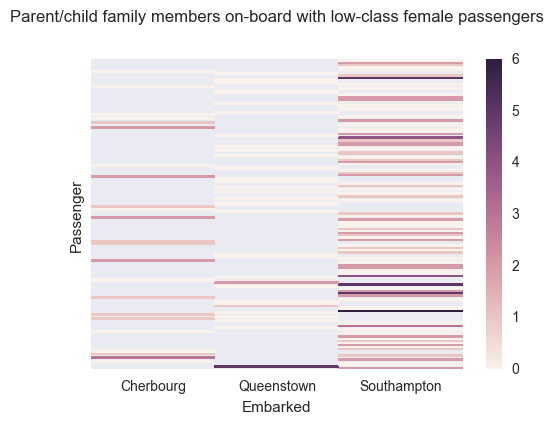

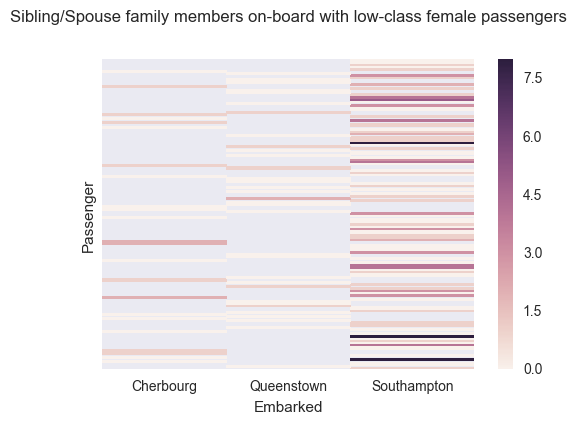

In [20]:
low_class_passengers_female_pivoted_parch = low_class_passengers_female.pivot(index='PassengerId', columns='Embarked', values='Parch')
low_class_passengers_female_pivoted_sibsp = low_class_passengers_female.pivot(index='PassengerId', columns='Embarked', values='SibSp')

sns.heatmap(low_class_passengers_female_pivoted_parch, yticklabels=False)
plt.title('Parent/child family members on-board with low-class female passengers', y=1.1)
plt.ylabel('Passenger')
plt.show()

sns.heatmap(low_class_passengers_female_pivoted_sibsp, yticklabels=False)
plt.title('Sibling/Spouse family members on-board with low-class female passengers', y=1.1)
plt.ylabel('Passenger')
plt.show()


## Conclusions

I was interested in exploring port of departure since it is related to socioeconomic and demographic factors. I found differences in survival rate based on port of departure, and within that category identified gender and familial factors that are associated with survival outcome. 

*Q1. What was the class breakdown for passengers departing from different ports?*
> The mean class of passengers departing from Cherbourg was 1.89, from Southampton was 2.35, and from Queenstown was 2.9. Nearly all of the passengers who embarked in Queenstown were 3rd-class passengers, and Cherbourg had the highest proportion of high class passengers.

*Q2. Do passengers of the same class from different embarkation ports have similar survival rates?*
> Due to issues of sample size I considered only 3rd-class passengers for this question. As a whole, 3rd-class passengers from Cherbourg and Queenstown had similar survival rates (0.38) while passengers from Southampton had a survival rate of half that (0.19).

*Q3. Are these survival rates correlated with any demographic differences such as gender or familial status?*
> Survival rates for low-class passengers are correlated with demographic factors. Women from Queenstown were traveling with fewer family members and had a  high survival rate (0.73), while men from Queenstown had an extremely low survival rate (0.08).
Similarly, women from Southampton were more likely to travel with family members and were more likely to perish (survival rate = 0.38).

These analyses reveal correlations in port of departure and survival outcome, and suggest that passengers departing from the different ports may have been distinct types of travelers. A limitation to this analysis is that the data set does not contain information for all passengers on board. This data set only contains information for 891 of 2,224 (40%) total passengers on-board, and could be skewed for variables like port of departure, class, or sex. Further, the existing data was missing many entries in the 'Age' field, and consideration of this variable could add additional depth to this analysis. Additional data features like decoupeling the child/parent variable and the sibling/spouse variables could be important to the analysis as well. One can image that having a child on-board would be more of an encumberance than having a parent on-board.

The relationships revealed in this analysis are purely correlative and more rigorous statistical methods would strengthen this analysis. Calculating factors like the mode, range, and variance of the family-member variables relative to port of departure and survival outcome could provide additional features of passengers likely to survive.

Ultimately, this analysis cannot draw conclusions as to *why* passengers from different ports survived at different rates, but the relationships revealed are an interesting facet of the data and lead one to imagine the personal motives and life events that lead to passengers being aboard the Titanic.